# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 04

Group Members:
- Muhamad Rafli Rasyiidin (13522088)
- Julian Caleb Simandjuntak (13522099)
- Christopher Brian (13522106)
- Indraswara Galih Jayanegara (13522119)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# Selalu tampilkan semua kolom pada output
pd.set_option('display.max_columns', None)

# Import file csv train
additional_features_train = pd.read_csv('https://drive.google.com/uc?id=1nC3zLlKlUdDZCFqQCa5mdtJLc4h-kXK9')
basic_features_train = pd.read_csv('https://drive.google.com/uc?id=1kyqx2WrYUHV0P74SWx_GUTpmmVTG1pw1')
flow_features_train = pd.read_csv('https://drive.google.com/uc?id=1k4ovJ8w8ZHtBV_XOp1WFPVolheWoHSmh')
content_features_train = pd.read_csv('https://drive.google.com/uc?id=1XP-QOpMFnFPjSIsLFA6xtovVcV1Viyft')
time_features_train = pd.read_csv('https://drive.google.com/uc?id=1QnNviNpoKggFeuzFQAWjU-FlfobRDCDm')
labels_train = pd.read_csv('https://drive.google.com/uc?id=14hflzUn7iYPJCwsOwDKjGEp7ZP1HtzY8')

# # Gabungkan semua dataframe menjadi satu dataframe
df_combined = pd.concat([additional_features_train, basic_features_train, flow_features_train, content_features_train, time_features_train, labels_train], axis = 1)

# # Hilangkan atribut id yang duplikat (ada di semua file)
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Data Understanding

In [3]:
# Ukuran data dan tipe data
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              166536 non-null  object 
 14  dur                166619 non-null  float64
 15  sbytes             166780 non-null  float64
 16  db

In [4]:
# Data statistik dasar untuk tiap feature non-kategorikal
continuous_features = df_combined.select_dtypes(include=['number']).drop(columns=['id'])
continuous_features.describe()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,label
count,166595.000000,166706.000000,166694.000000,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,166553.000000,166446.000000,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,166655.000000,166601.000000,166562.000000,1.666690e+05,1.665380e+05,166553.000000,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000,175341.000000
mean,0.015799,1.303852,0.132722,0.014974,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,4.198363,8.731000,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,18.923015,116.184837,114.956407,9.696210e+08,9.693479e+08,136.803840,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402,0.680622
std,0.124697,0.954779,0.692019,0.126338,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,5.775348,10.956486,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,110.898133,126.994753,126.880855,1.355284e+09,1.354113e+09,204.753194,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619,0.466237
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,57.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,73.000000,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,10.000000,255.000000,255.000000,1.915654e+09,1.912673e+09,100.000000,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951,1.000000
max,1.000000,6.000000,30.000000,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,10974.000000,255.000000,255.000000,4.294959e+09,4.294882e+09,1504.000000,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884,1.000000


In [5]:
# Jumlah nilai unik tiap feature kategorikal
categorical_features = df_combined.select_dtypes(include=['object'])
unique_values_counts = categorical_features.nunique()
print(unique_values_counts)

state           9
service        13
proto         133
attack_cat     10
dtype: int64


In [6]:
# Missing values
null_values = df_combined.isna().sum()
print(null_values)

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt      

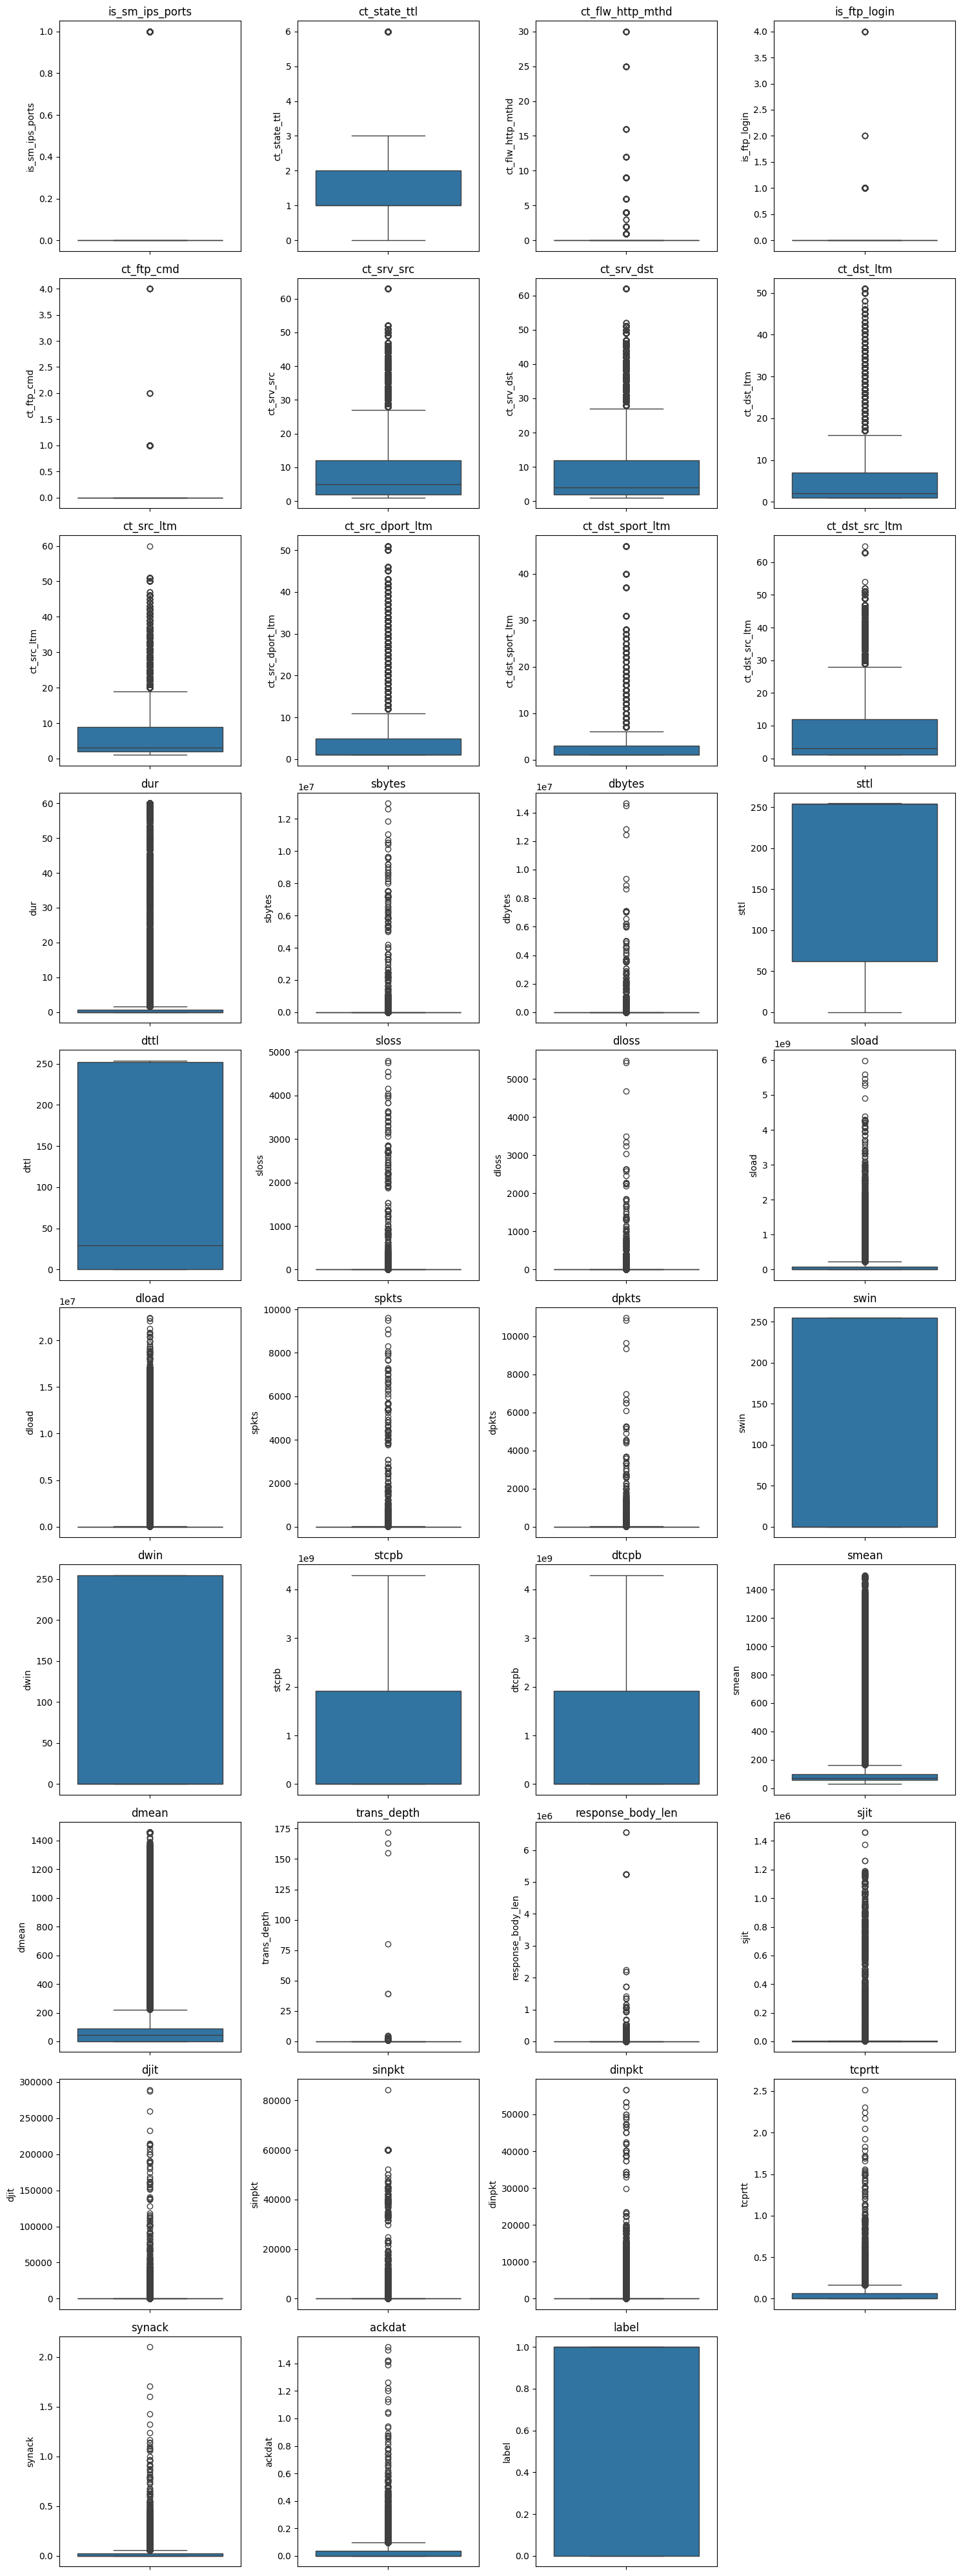

In [7]:
# Outlier setiap feature (nonkategorikal)
# Menggunakan boxplot

plt.figure(figsize=(15, 40))

for i, column in enumerate(continuous_features.columns, 1):
    plt.subplot(10, 4, i) 
    sns.boxplot(y=continuous_features[column])
    plt.title(column)

plt.tight_layout() 
plt.show()

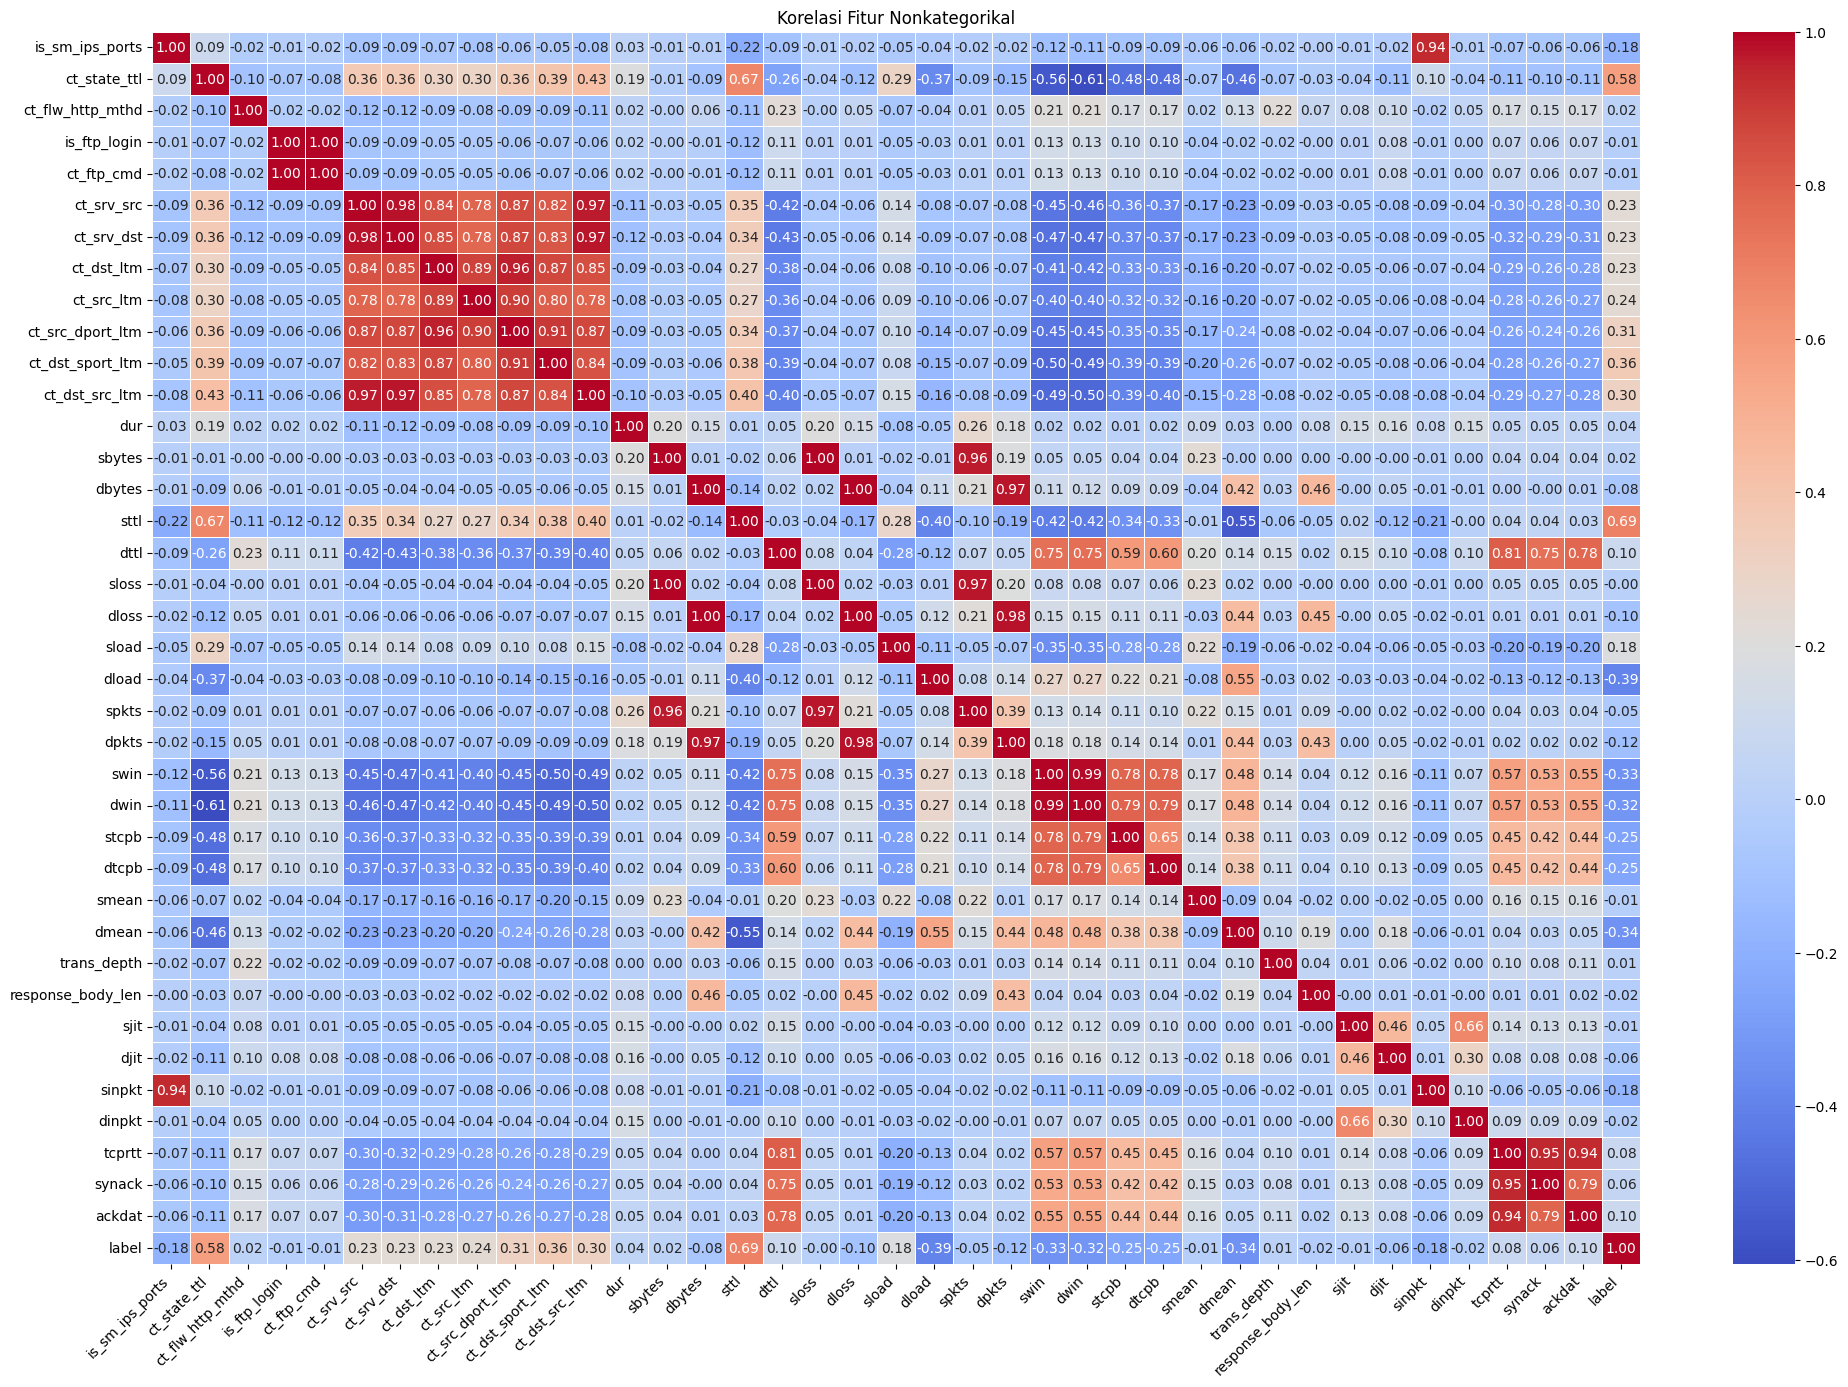

In [8]:
# Korelasi antar fitur nonkategorikal
corr_matrix = continuous_features.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Korelasi Fitur Nonkategorikal')
plt.xticks(rotation=45, ha='right')
plt.show()

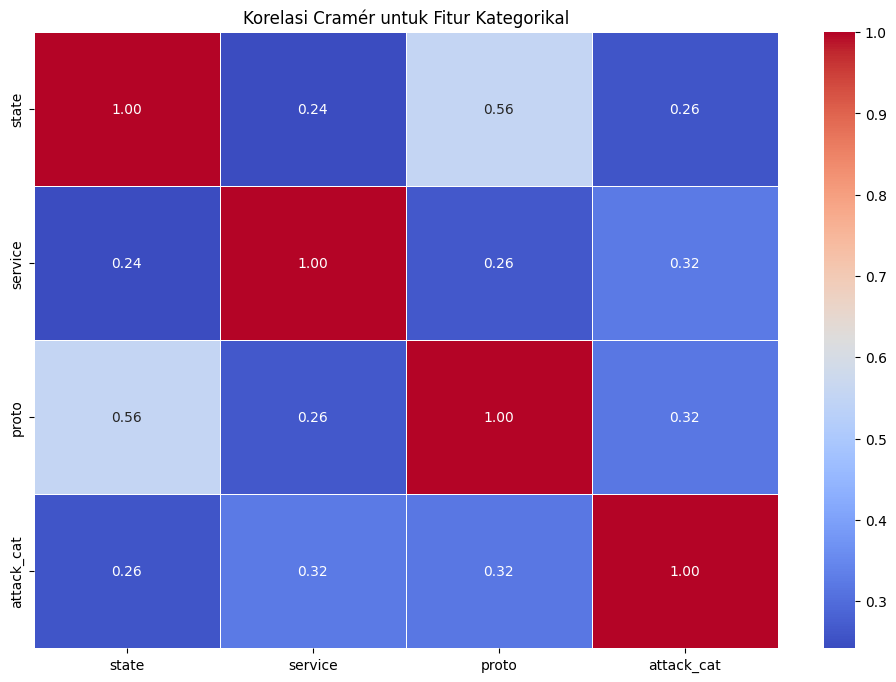

In [9]:
# Korelasi antara fitur kategorikal dengan Cramer
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

cramers_matrix = pd.DataFrame(index=categorical_features.columns, columns=categorical_features.columns)

for col1 in categorical_features.columns:
    for col2 in categorical_features.columns:
        cramers_matrix.loc[col1, col2] = cramers_v(df_combined[col1], df_combined[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Cramér untuk Fitur Kategorikal')
plt.show()

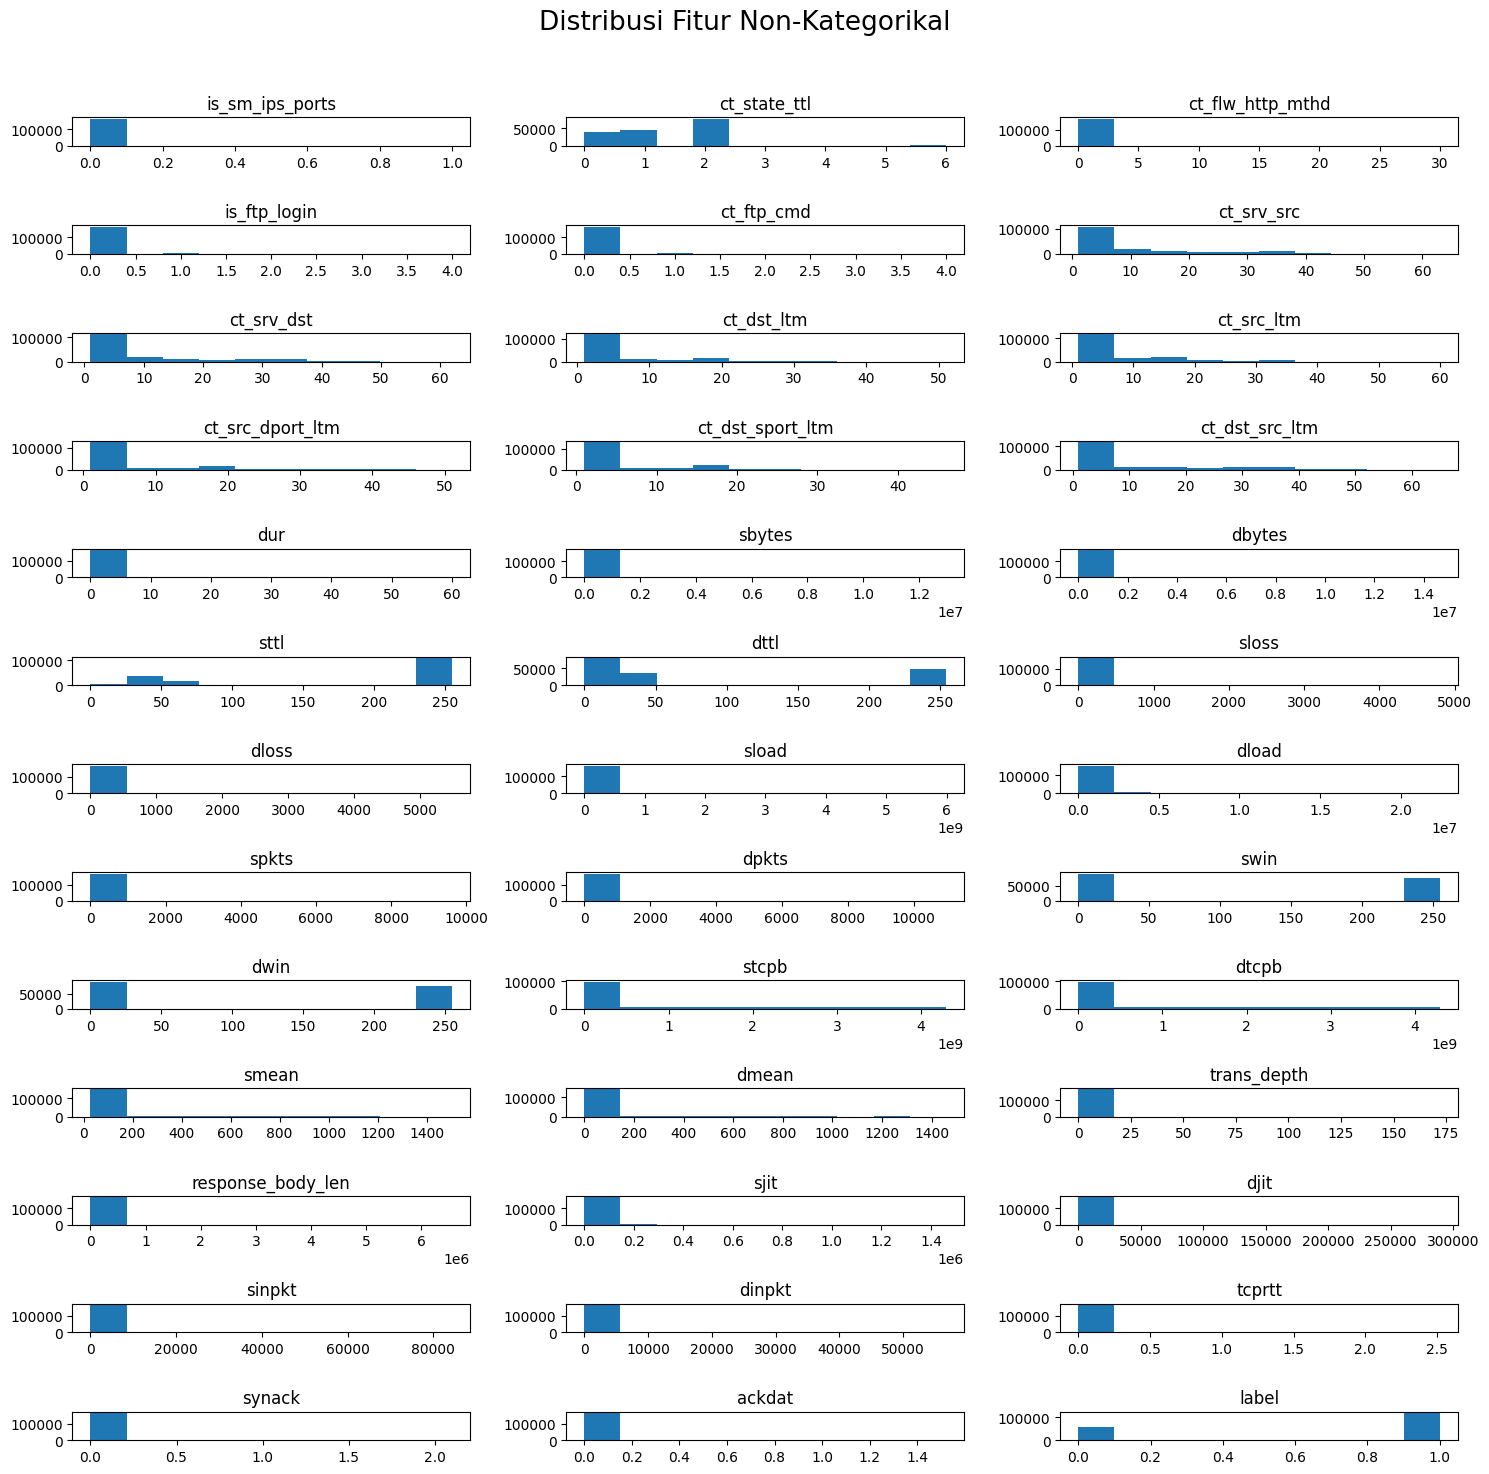

In [10]:
# Visualisasi distribusi fitur nonkategorikal
fig, ax = plt.subplots(13, 3, figsize=(15, 15))
fig.suptitle('Distribusi Fitur Non-Kategorikal', fontsize=19)

for idx in range(39):
    i, j = divmod(idx, 3)
    ax[i, j].hist(continuous_features[continuous_features.columns[idx]])
    ax[i, j].set_title(continuous_features.columns[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

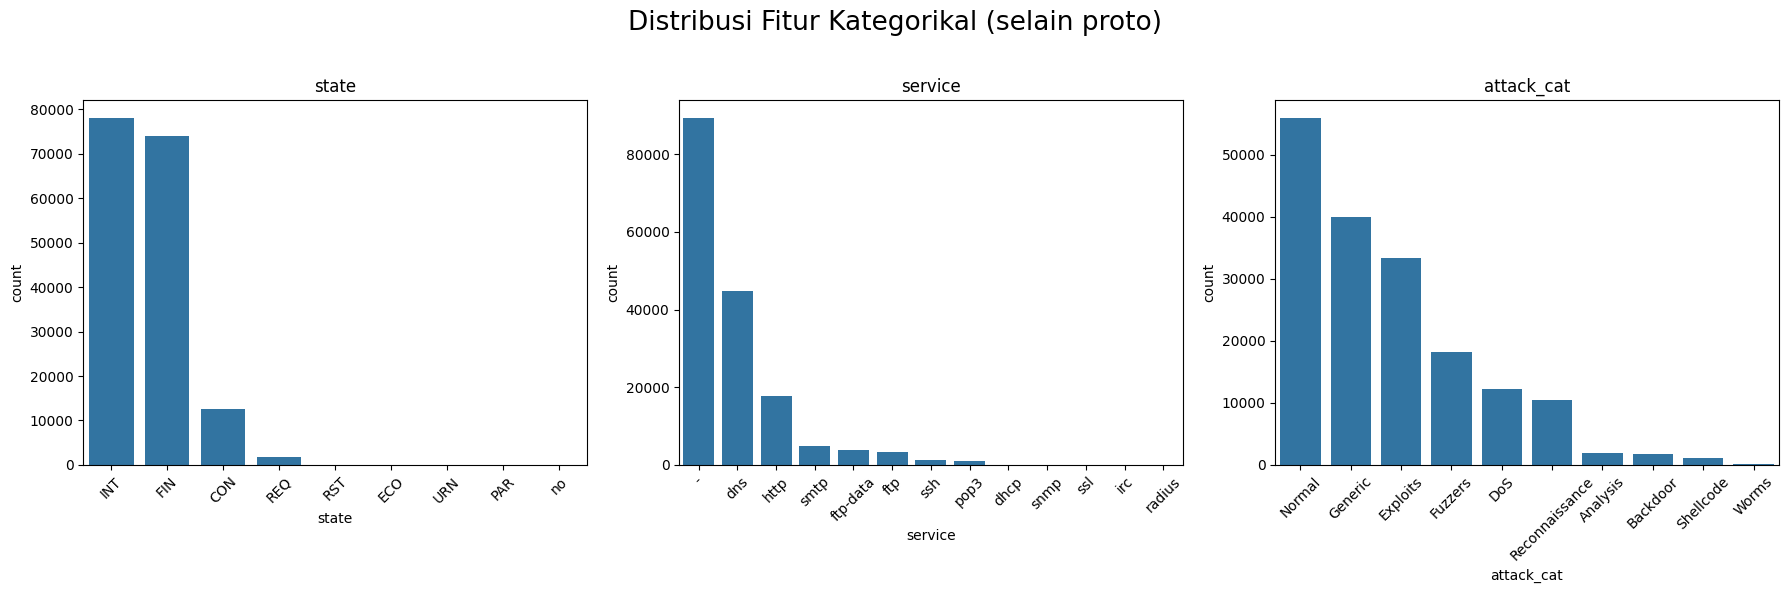

In [11]:
# Visualisasi distribusi fitur kategorikal (kecuali proto)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribusi Fitur Kategorikal (selain proto)', fontsize=19)

for idx in range(3):
    feature = categorical_features.drop('proto', axis=1).columns[idx]
    sns.countplot(data=categorical_features, x=feature, ax=ax[idx], order=categorical_features[feature].value_counts().index)
    ax[idx].set_title(feature)
    ax[idx].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

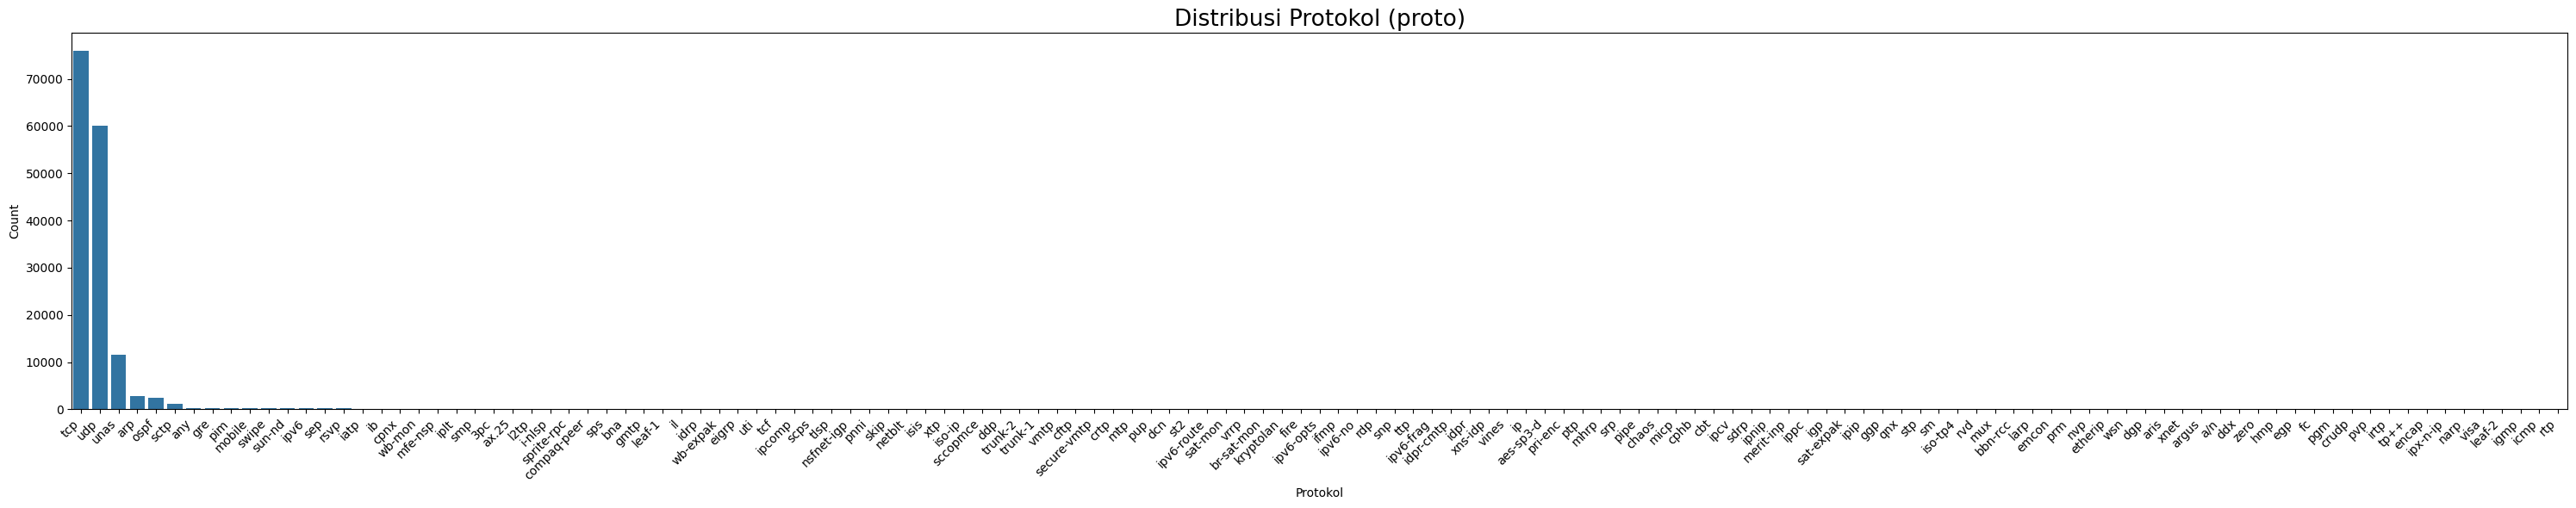

In [12]:
# Visualisasi distribusi fitur kategorikal (khusus proto)
plt.figure(figsize=(30, 6))
sns.countplot(data=categorical_features, x='proto', order=categorical_features['proto'].value_counts().index)
plt.title('Distribusi Protokol (proto)', fontsize=19)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Protokol')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [13]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Splitting dilakukan dengan menggunakan train-test split atau hold-out split
# Random state 69 karena aestetik kata Chris

# train_set, val_set = train_test_split(df_combined, test_size=0.2, random_state=42) 

# with pd.option_context('display.max_columns', None):
#     print(train_set.info())


In [14]:
# Splitting yang dilakukan dengan K-fold validation
# X: predictor features, Y: target feature (attack_cat)
X = df_combined.drop(columns=['attack_cat'])
y = df_combined['attack_cat']

X_train_array = []
X_val_array = []
y_train_array = []
y_val_array = []

kf = KFold(n_splits=5, shuffle=True, random_state=135)
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    X_train_array.append(X_train)
    X_val_array.append(X_val)
    y_train_array.append(y_train)
    y_val_array.append(y_val)
    
# X_train_array[0].head()
len(X_train_array)

5

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [15]:
# Banyak nilai yang hilang
# print(train_set.isna().sum())

In [16]:
# Cleaning akan dilakukan dengan menggunakan SimpleImputer, dengan median pada data numerical dan most frequent pada data categorical

# # Versi train-test split
# # Pilih selain yang object, ini buat number 
# train_set_num = train_set.select_dtypes(include=['number']).drop(columns=['id'])
# imputer = SimpleImputer(strategy='median')
# imputer.fit(train_set_num)
# train_set_num_imputed = imputer.transform(train_set_num)
# train_set_num_imputed = pd.DataFrame(train_set_num_imputed, columns=train_set_num.columns)


# # Pilih yang categorical (object) 
# train_set_cat = train_set.select_dtypes(include=['object'])
# print(train_set_cat.isna().sum())
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit(train_set_cat)
# train_set_cat_imputed = imputer.transform(train_set_cat)
# train_set_cat_imputed = pd.DataFrame(train_set_cat_imputed, columns=train_set_cat.columns)
# # print("Setelah update: ")
# # print(train_set_cat_imputed.isna().sum())

# Versi K-fold
def NumericalImputer(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns
    df_categorical = df[categorical_cols]

    imputer = SimpleImputer(strategy='median')
    df_numerical = pd.DataFrame(
        imputer.fit_transform(df[numerical_cols]), 
        columns=numerical_cols, 
        index=df.index
    )

    df_combined = pd.concat([df_numerical, df_categorical], axis=1)

    return df_combined
    
def CategoricalImputer(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns
    df_numerical = df[numerical_cols]
    
    imputer = SimpleImputer(strategy='most_frequent')
    df_categorical = pd.DataFrame(
        imputer.fit_transform(df[categorical_cols]),
        columns=categorical_cols,
        index=df.index
    )

    df_combined = pd.concat([df_numerical, df_categorical], axis=1)

    return df_combined


for i in range (len(X_train_array)):
    X_train_array[i] = NumericalImputer(X_train_array[i])
    X_train_array[i] = CategoricalImputer(X_train_array[i])

    X_val_array[i] = NumericalImputer(X_val_array[i])
    X_val_array[i] = CategoricalImputer(X_val_array[i])

X_train_array[0].head()
# print(X_train_array[0].isna().sum())

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,label,state,service,proto
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,1.0,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,1.0,INT,dns,udp
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,2.0,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,201002858.0,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,1.0,FIN,-,tcp
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,3.0,3.849634,25160.0,164.0,31.0,29.0,38.0,390.0,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,0.000000e+00,661443578.0,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,0.000000,0.0,FIN,-,tcp
5,0.0,2.0,0.0,0.0,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,5.0,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,9.120000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,1.0,INT,dns,udp
6,0.0,2.0,0.0,0.0,0.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,6.0,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,5.700000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,1.0,INT,dns,udp


In [17]:
# Kita juga akan drop kolom label karena tidak berdampak pada target
def DropColumnLabel(df): 
    df.drop('label', axis = 1, inplace = True)

for i in range (len(X_train_array)):
    DropColumnLabel(X_train_array[i])
    DropColumnLabel(X_val_array[i])
    
X_train_array[0].head()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,state,service,proto
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,1.0,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,2.0,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,201002858.0,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,FIN,-,tcp
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,3.0,3.849634,25160.0,164.0,31.0,29.0,38.0,390.0,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,0.000000e+00,661443578.0,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,0.000000,FIN,-,tcp
5,0.0,2.0,0.0,0.0,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,5.0,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,9.120000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp
6,0.0,2.0,0.0,0.0,0.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,6.0,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,5.700000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [18]:
# Handling outliers using IQR and clipping

def numerical_outliers_handler(df: pd.DataFrame):
  data = df.copy()
  df = df.select_dtypes(include='number')
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  # outliers = df[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))]
  for col in df.columns:
    data[col] = data[col].clip(lower=q1[col] - 1.5 * iqr[col], upper=q3[col] + 1.5 * iqr[col])
  return data

for col in categorical_features.columns:
  print(categorical_features[col].value_counts())
  print()

# print(df_combined[df_combined['state'] == "no"])
# print(len(df_combined))

def categorical_rare_values_handler(df):
  # Only 'state' column that has a rare value
  df = df[df["state"].str.len() == 3]
  return df

state
INT    78148
FIN    73925
CON    12481
REQ     1889
RST       78
ECO       12
URN        1
PAR        1
no         1
Name: count, dtype: int64

service
-           89434
dns         44909
http        17784
smtp         4815
ftp-data     3795
ftp          3263
ssh          1242
pop3         1054
dhcp           93
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64

proto
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
visa         89
leaf-2       89
igmp         18
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64



### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [19]:
# Untuk duplicate, akan di drop segala row yang duplicate (untuk train dan validation) melalui pipeline
# Hal ini dilakukan untuk menghindari bias
# Hanya train set yang diremove duplicatenya

# print(X_train_array[0].head())

def RemoveDuplicate(df):
    return df.drop_duplicates()

for i in range (len(X_train_array)):
    X_train_array[i] = RemoveDuplicate(X_train_array[i])
    
print(X_train_array[0].isna().sum())
# X_train_array[0].head()


is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
id                   0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
state                0
service              0
proto                0
dtype: int64


In [20]:
X_train_array[0]

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,state,service,proto
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,1.0,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,2.0,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,2.010029e+08,170.0,114.0,0.0,0.0,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,FIN,-,tcp
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,3.0,3.849634,25160.0,164.0,31.0,29.0,38.0,390.0,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,0.000000e+00,6.614436e+08,56.0,1276.0,0.0,0.0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,0.000000,FIN,-,tcp
5,0.0,2.0,0.0,0.0,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,5.0,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,9.120000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp
6,0.0,2.0,0.0,0.0,0.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,6.0,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,5.700000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175334,0.0,1.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,1.0,1.0,2.0,175334.0,0.362022,1026.0,1066.0,254.0,252.0,2.0,2.0,2.041865e+04,2.061753e+04,10.0,8.0,255.0,255.0,1.295007e+09,2.785555e+09,103.0,133.0,1.0,98.0,2067.827556,63.012734,40.224667,45.036855,0.090692,0.000000,0.044978,FIN,http,tcp
175335,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,175335.0,0.000000,46.0,0.0,0.0,29.0,0.0,0.0,0.000000e+00,0.000000e+00,1.0,2.0,0.0,0.0,0.000000e+00,0.000000e+00,46.0,0.0,0.0,0.0,10.954492,0.000000,60000.444000,0.000000,0.000000,0.000000,0.000000,INT,-,arp
175337,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,175337.0,4.449357,1272.0,1634.0,62.0,29.0,7.0,0.0,2.191777e+03,2.804900e+03,24.0,22.0,255.0,255.0,3.482672e+09,2.783193e+09,53.0,74.0,0.0,0.0,15464.286700,531.848125,193.445428,209.600766,0.066524,0.047738,0.018786,FIN,ftp,tcp
175338,0.0,2.0,0.0,0.0,0.0,33.0,33.0,16.0,16.0,16.0,16.0,33.0,175338.0,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,5.700000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,INT,dns,udp


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [21]:
def FeatureEngineering(df):
    # Fitur baru, berkaitan dengan rasio
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['spkts'] / (df['spkts'] + 1)
    df['load_ratio'] = df['sload'] / (df['sdload'] + 1)
    df['jit_ratio'] = df['sjit'] / (df['djit'] + 1)
    df['inter_pkt_ratio'] = df['Sinpkt'] / (df['dinpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Fitur baru, berkaitan dengan agregat
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['spkts'] + df['dpkts']
    df['total_load'] = df['sload'] + df['dload']
    df['total_jitter'] = df['sjit'] + df['djit']
    df['total_inter_pkt'] = df['sinpkt'] + df['dinpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Fitur baru, berkaitan dengan interaksi
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
    df['load_jit_interaction_src'] = df['sload'] * df['sjit']
    df['load_jit_interaction_dst'] = df['dload'] * df['djit']
    df['pkt_jit_interaction_src'] = df['spkts'] * df['sjit']
    df['pkt_jit_interaction_dst'] = df['dpkts'] * df['djit']

    # Fitur baru, berkaitan dengan statistik
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [22]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [23]:
# Write your code here
from sklearn.preprocessing import StandardScaler
# standarize data
class FeatureScaler(BaseEstimator, TransformerMixin): 
    def __init__(self): 
        pass

    def fit(self, df): 
        return self
    
    def transform(self, df): 
        data = df.copy()
        data = data.select_dtypes(include="number")
        data = data.drop(columns=["is_ftp_login", "is_sm_ips_ports"])

        # Uncomment this if you want to use Robust Scaling
        # columns_to_drop = [col for col in data.columns if col not in columns_to_keep]
        # q1 = data.quantile(0.25)  
        # q3 = data.quantile(0.75)

        # for col, q_val in q1.items():
        #     if q3[col] - q1[col] == 0:
        #         q1 = q1.drop(col)
        #         q3 = q3.drop(col)
        # data = (data - q1)/(q3 - q1)

        # Currently, we use Min Max Scaling because the outliers are already handled
        columns_to_keep = [col for col in data.columns if (data[col] > 100).sum() > len(data[col]) / 2]
        data = data[columns_to_keep]
        min = data.min()
        max = data.max()
        data = (data - min)/(max - min)
        for col in data.columns:
            df[col] = data[col]
        return df

for x in X_train_array:
    y = x.select_dtypes(include="number")
    # for z in y.columns:
    #     print(z)
    #     print(y[z].value_counts())
    # print(y.quantile(0.25))
    # print("===============================================")
    # p = y.quantile(0.75)
    # q = y.quantile(0.25)
    # for i, x in p.items():
    #     print(q)
    #     print(x)
# print(train_set["is_sm_ips_ports"].unique())

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [24]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object', 'category']).columns:
            le = LabelEncoder()
            le.fit(X[col].astype(str))
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col, le in self.encoders.items():
            X_encoded[col] = X[col].astype(str).apply(
                lambda x: le.transform([x])[0] if x in le.classes_ else -1
            )
        return X_encoded

        
        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [25]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [26]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [27]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [28]:

# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

pipe = Pipeline([
    ("encoder", FeatureEncoder()),
    ("scaler", FeatureScaler())
])

processed_X_train_array = []
processed_X_val_array = []
processed_y_train_array = []
processed_y_val_array = []

for i in range(len(X_train_array)):
    processed_X_train = pipe.fit_transform(X_train_array[i])
    processed_X_train_array.append(processed_X_train)
    
    processed_X_val = pipe.transform(X_val_array[i])
    processed_X_val_array.append(processed_X_val)

    # processed_y_train_array.append(y_train_array[i])
    # processed_y_val_array.append(y_val_array[i])

X_train_array = processed_X_train_array
X_val_array = processed_X_val_array
# y_train_array = processed_y_train_array
# y_val_array = processed_y_val_array

# print(X_val_array[0].head())


c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c

In [29]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

for i in range(len(X_val_array)):
    processed_X_val = pipe.transform(X_val_array[i])
    processed_X_val_array.append(processed_X_val)

print(X_val_array[0].head())
print(X_val_array[1].head())

    

c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c

    is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0               0.0           0.0               0.0           0.0         0.0   
4               0.0           0.0               0.0           0.0         0.0   
14              0.0           2.0               0.0           0.0         0.0   
17              0.0           1.0               1.0           0.0         0.0   
19              0.0           1.0               1.0           0.0         0.0   

    ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  \
0         11.0         4.0         5.0         4.0               2.0   
4          3.0         3.0         4.0         3.0               1.0   
14        17.0        17.0        17.0        18.0              17.0   
17         1.0         1.0         2.0         2.0               1.0   
19         1.0         4.0         1.0        17.0               1.0   

    ct_dst_sport_ltm  ct_dst_src_ltm        id       dur    sbytes    dbytes  \


c:\Users\Rafli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


or create your own here

In [30]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [31]:
# Scikit-learn
knn_model = KNeighborsClassifier(n_neighbors=5)

for i in range(len(X_train_array)):
    knn_model.fit(X_train_array[i], y_train_array[i])
    
# for i in range(len(X_val_array)):
    y_pred = knn_model.predict(X_val_array[i])
    accuracy = accuracy_score(y_val_array[i], y_pred)
    print(f"Fold {i+1}: Accuracy = {accuracy:.2f}")

# knn_model.fit(X_train_array[0], y_train_array[0])
# y_pred = knn_model.predict(X_val_array[0])
# accuracy = accuracy_score(y_val_array[0], y_pred)
# print(f"Fold {1}: Accuracy = {accuracy:.2f}")

len(X_train_array)



Fold 1: Accuracy = 0.66
Fold 2: Accuracy = 0.66
Fold 3: Accuracy = 0.66
Fold 4: Accuracy = 0.66
Fold 5: Accuracy = 0.66


5

## B. Naive Bayes

In [47]:
# Type your code here
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
for i in range(len(X_train_array)):
    model.fit(X_train_array[i], y_train_array[i])
    
    y_pred = model.predict(X_val_array[i])
    accuracy = accuracy_score(y_pred, y_val_array[i])
    print(f"Fold {i+1}: Accuracy = {accuracy:.2f}")

Fold 1: Accuracy = 0.43
Fold 2: Accuracy = 0.43
Fold 3: Accuracy = 0.43
Fold 4: Accuracy = 0.43
Fold 5: Accuracy = 0.43


In [ ]:
# Implementation from scratch for Naive Bayes
from sklearn.metrics import accuracy_score

class NaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, categorical_col, numerical_col):
        self.categorical_col = categorical_col
        self.numerical_col = numerical_col

    def fit(self, x, y):
        self.target_classes = np.unique(y)
        self.categorical_prob = {}
        self.target_val_prob = {}
        self.mean = {}
        self.std = {}
        numerical_data =  x[numerical_col]
        # self.mean = numerical_data.mean()
        # self.std = numerical_data.std()

        for classes in self.target_classes:
            x_class = x[y == classes]
            self.target_val_prob[classes] = len(x_class)/len(x) # Menghitung peluang value target tertentu

            self.categorical_prob[classes] = {}
            for col in categorical_col:
                unique_val_count = x_class[col].value_counts()
                self.categorical_prob[classes][col] = (unique_val_count/len(x_class)).to_dict()

            self.mean[classes] = {}
            self.std[classes] = {}
            for col in numerical_col:
                self.mean[classes][col] = x_class[col].mean()
                self.std[classes][col] = x_class[col].std()

    def gaussian(self,x, mean, std):
        return (1/(np.sqrt(2*np.pi)*std)*(np.exp(-0.5 * ((x-mean)/std)**2)))

    def predict(self, x):
        prediction = []
        for idx, x in x.iterrows():
            class_probs = {}

            for classes in self.target_classes:
                prob = self.target_val_prob[classes]

                for col in categorical_col:
                    value = x[col]
                    probability = self.categorical_prob[classes][col].get(value)
                    if (probability is not None):
                        prob *= probability

                for col in numerical_col:
                    mean = self.mean[classes][col]
                    std = self.std[classes][col]
                    probability = self.gaussian(x[col], mean, max(std, 1e-6))
                    prob *= probability
            
                class_probs[classes] = prob
            
            prediction.append(max(class_probs, key=class_probs.get))

        return np.array(prediction)

    def save_model_to_pkl(self, file_path: str):
        with open(file_path, "wb") as f:
            pickle.dump(self, f)

  
    def load_model_from_pkl(file_path: str):
        with open(file_path, "rb") as f:
            return pickle.load(f)

categorical_col = df_combined.select_dtypes(include="object").columns.tolist()
categorical_col.remove('attack_cat')
numerical_col = df_combined.select_dtypes(include="number").columns.tolist()
numerical_col.remove('label')

nb = NaiveBayesClassifier(categorical_col, numerical_col)
for i in range(len(X_train_array)):
    nb.fit(X_train_array[i], y_train_array[i])
    
    y_pred = nb.predict(X_val_array[i])
    accuracy = accuracy_score(y_val_array[i], y_pred)
    print(f"Fold {i+1}: Accuracy = {accuracy:.2f}")




Fold 1: Accuracy = 0.43
Fold 2: Accuracy = 0.42
Fold 3: Accuracy = 0.43
Fold 4: Accuracy = 0.40
Fold 5: Accuracy = 0.40


## C. ID3

In [34]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [35]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [36]:
# Import dataset test
# additional_features_test = pd.read_csv('https://drive.google.com/uc?id=1D-zetiIV7onYCF8Id0ooTdtunAv0iISI')
# basic_features_test = pd.read_csv('https://drive.google.com/uc?id=1XFOKbaT6huUD-vU6nVnR1NpdHY5vgww1')
# flow_features_test = pd.read_csv('https://drive.google.com/uc?id=1rEdD0uyBxnj-uPIFsMQc4mn0xZvK4ox9')
# content_features_test = pd.read_csv('https://drive.google.com/uc?id=1PqZmaoNoWskQjYV0YSiREuIE-bhFXI2m')
# time_features_test = pd.read_csv('https://drive.google.com/uc?id=1IK6td6mTAywURrpTWH2FpKwoD59Rl7xx')

# df_combined_test = pd.concat([additional_features_test, basic_features_test, flow_features_test, content_features_test, time_features_test], axis = 1)

# # Hilangkan atribut id yang duplikat (ada di semua file)
# df_combined_test = df_combined_test.loc[:, ~df_combined_test.columns.duplicated()]

In [37]:
# Split X-y
# df_combined_X_train = df_combined.drop(columns=["attack_cat"])
# df_combined_y_train = df_combined["attack_cat"]

In [38]:
# Cleaning
# Cleaning training set
# df_combined_X_train = NumericalImputer(df_combined_X_train)
# df_combined_X_train = CategoricalImputer(df_combined_X_train)
# DropColumnLabel(df_combined_X_train)
# df_combined_X_train = RemoveDuplicate(df_combined_X_train)


# # Cleaning test set
# df_combined_test = NumericalImputer(df_combined_test)
# df_combined_test = CategoricalImputer(df_combined_test)
# df_combined_test = RemoveDuplicate(df_combined_test)

In [39]:
# Membuat pipeline submission
# submission_pipe = Pipeline([
#     ("encoder", FeatureEncoder())
# ])

# # Preprocessing
# # Fit and transform training set
# processed_train = pipe.fit_transform(df_combined_X_train)
# # Transform test set
# processed_test = pipe.transform(df_combined_test)

In [40]:
# Retrain model
# knn_model.fit(processed_train, df_combined_y_train)

In [41]:
# Predict the test set
# test_prediction = knn_model.predict(processed_test)
# test_prediction_df = pd.DataFrame(test_prediction, columns=["Prediction"])

In [42]:
# Make submission
# test_prediction_df.to_csv("submission.csv", index=False)
# print("Submission file created")